In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.train_medical import run_mimic_experiments, run_eeg_experiments, run_medical_experiments

# MIMIC-III: forecasting white blood cell count

In [3]:
mimic_results = run_medical_experiments(retrain=False, dataset='mimic')

Training CPRNN
Epoch: 0	Train loss: 156.74915640694755
Epoch: 50	Train loss: 53.13235078539167
Epoch: 100	Train loss: 53.64533070155552
Epoch: 150	Train loss: 51.56313732692173
Epoch: 200	Train loss: 55.60751519884382
Epoch: 250	Train loss: 51.39998326982771
Epoch: 300	Train loss: 50.69910785130092
Epoch: 350	Train loss: 51.46189144679478
Epoch: 400	Train loss: 51.4951046534947
Epoch: 450	Train loss: 51.346938133239746
Epoch: 500	Train loss: 52.24199744633266
Epoch: 550	Train loss: 52.51100335802351
Epoch: 600	Train loss: 50.9170960017613
Epoch: 650	Train loss: 55.39422171456473
Epoch: 700	Train loss: 67.61379609789167
Epoch: 750	Train loss: 50.58711297171457
Epoch: 800	Train loss: 51.071151869637625
Epoch: 850	Train loss: 50.609366689409526
Epoch: 900	Train loss: 51.22157260349819
Epoch: 950	Train loss: 51.123785155160085
Training QRNN
Epoch:  0 | train loss: 2.4016
Epoch:  1 | train loss: 1.7792
Epoch:  2 | train loss: 1.4248
Epoch:  3 | train loss: 1.1771
Epoch:  4 | train loss: 1.6

# EEG dataset: forecasting EEG signals
Signals come from different distributions. Patients are shown different combinations of stimuli, and the recordings are taken from different parts of the brain.

Split 896 training instances to 600 / 296 true training/calibration.

(if using control data only, then 448 = 300 + 148)

Downsample training sequences to 50 steps
* 40 steps input, 10 prediction

In [4]:
eeg_results = run_medical_experiments(retrain=False, dataset='eeg')

Training CPRNN
Epoch: 0	Train loss: 178.0243228430887
Epoch: 50	Train loss: 79.83200954696507
Training QRNN
Epoch:  0 | train loss: 2.4025
Epoch:  1 | train loss: 4.0240
Epoch:  2 | train loss: 2.2210
Epoch:  3 | train loss: 1.5019
Epoch:  4 | train loss: 1.5708
Epoch:  5 | train loss: 1.1723
Epoch:  6 | train loss: 1.7083
Epoch:  7 | train loss: 1.2255
Epoch:  8 | train loss: 1.6199
Epoch:  9 | train loss: 1.2447
Training DPRNN
Epoch:  0 | train loss: 76.9477
Epoch:  1 | train loss: 112.3602
Epoch:  2 | train loss: 117.2525
Epoch:  3 | train loss: 111.4457
Epoch:  4 | train loss: 62.4106
Epoch:  5 | train loss: 106.0785
Epoch:  6 | train loss: 94.1434
Epoch:  7 | train loss: 115.3275
Epoch:  8 | train loss: 132.0747
Epoch:  9 | train loss: 84.9091


## COVID-19: forecasting daily cases

In [ ]:
eeg_results = run_medical_experiments(retrain=False, dataset='covid')

## The results

### MIMIC

In [ ]:
mimic_results = run_medical_experiments(dataset='mimic')

In [7]:
mimic_results['CPRNN'].keys()

dict_keys(['Point predictions', 'Errors', 'Independent coverage indicators', 'Joint coverage indicators', 'Upper limit', 'Lower limit', 'Mean independent coverage', 'Mean joint coverage', 'Confidence interval widths', 'Mean confidence interval widths'])

**Joint coverage**

In [6]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    print(mimic_results[baseline]['Mean joint coverage'])

0.406
0.884
0.9340000152587891


**Independent coverage**

In [56]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    independent_coverages = mimic_results[baseline]['Mean independent coverage']
    print(independent_coverages)
#     print(mimic_results[baseline]['Mean independent coverage'].mean(), mimic_results[baseline]['Mean independent coverage'].std())
    print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))
    print()

[0.488 0.446]
[44.6\%, 48.8\%]

[0.888 0.9  ]
[88.8\%, 90.0\%]

tensor([0.9440, 0.9420])
[94.2\%, 94.4\%]



**Mean absolute error**

In [48]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    print(mimic_results[baseline]['Errors'].mean(axis=0))
    print('{:.2f} \\(\\pm\\) {:.2f}'.format(mimic_results[baseline]['Errors'].mean(), mimic_results[baseline]['Errors'].std()))
    print()

[1.927075   2.21184482]
2.07 \(\pm\) 2.22

[4.81655517 4.92795841]
4.87 \(\pm\) 5.16

tensor([4.5027, 4.4842], grad_fn=<MeanBackward1>)
4.49 \(\pm\) 5.41



**Interval widths**

In [39]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    print(mimic_results[baseline]['Mean confidence interval widths'].mean(), mimic_results[baseline]['Mean confidence interval widths'].std())

3.708849 0.0013008118
17.327356 0.31484222
tensor(22.1189, grad_fn=<MeanBackward0>) tensor(0.0175, grad_fn=<StdBackward0>)


### EEG

In [28]:
eeg_results = run_medical_experiments(dataset='eeg')

In [17]:
eeg_results['CPRNN'].keys()

dict_keys(['Point predictions', 'Errors', 'Independent coverage indicators', 'Joint coverage indicators', 'Upper limit', 'Lower limit', 'Mean independent coverage', 'Mean joint coverage', 'Confidence interval widths', 'Mean confidence interval widths'])

**Joint coverage**

In [18]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    print(eeg_results[baseline]['Mean joint coverage'])

0.03697916666666667
0.48333333333333334
0.9624479413032532


**Independent coverage**

In [57]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    independent_coverages = eeg_results[baseline]['Mean independent coverage']
    print(independent_coverages)
#     print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(independent_coverages.mean() * 100, independent_coverages.std() * 100))
    print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))
    print()

[0.54802083 0.47260417 0.44598958 0.45963542 0.44895833 0.38666667
 0.35869792 0.39276042 0.40338542 0.41234375]
[35.9\%, 54.8\%]

[0.87979167 0.86119792 0.85307292 0.87854167 0.9021875  0.89640625
 0.88052083 0.88921875 0.89645833 0.87557292]
[85.3\%, 90.2\%]

tensor([0.9834, 0.9874, 0.9880, 0.9913, 0.9957, 0.9959, 0.9964, 0.9945, 0.9956,
        0.9955])
[98.3\%, 99.6\%]



**Mean absolute error**

In [51]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    errors = eeg_results[baseline]['Errors']
    print(errors.mean(axis=0)) 
    print('{:.2f} \\(\\pm\\) {:.2f}'.format(errors.mean(), errors.std()))
    print()

[4.17153255 5.0958436  5.45019966 5.32705752 5.31719101 5.84255341
 6.06781587 6.17297151 5.79370593 6.80491573]
5.60 \(\pm\) 6.29

[4.17282614 5.17806286 5.62175002 5.54051706 5.42578804 5.75217385
 5.92399208 6.03327778 5.50890278 5.84697887]
5.50 \(\pm\) 6.26

tensor([3.9408, 4.9060, 5.2894, 5.2271, 5.0685, 5.3623, 5.5810, 5.7798, 5.3333,
        5.6978], grad_fn=<MeanBackward1>)
5.22 \(\pm\) 5.56



**Interval widths**

In [40]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    print(eeg_results[baseline]['Mean confidence interval widths'])
    print(eeg_results[baseline]['Mean confidence interval widths'].mean(), eeg_results[baseline]['Mean confidence interval widths'].std())
    print()

[8.069833  8.346925  8.362585  8.371454  7.9061728 7.4074526 6.7820783
 7.6167903 7.5277386 8.71496  ]
7.9105988 0.55127597

[16.25452  18.90969  20.12203  21.13504  21.987425 23.122583 22.757807
 24.13705  23.045837 22.754507]
21.42265 2.2708325

tensor([30.9324, 42.4698, 47.8244, 52.9717, 61.8503, 67.3673, 71.6503, 66.6332,
        60.3954, 60.6945], requires_grad=True)
tensor(56.2789, grad_fn=<MeanBackward0>) tensor(12.6907, grad_fn=<StdBackward0>)



## COVID

In [30]:
covid_results = run_medical_experiments(dataset='covid')

In [31]:
covid_results['CPRNN'].keys()

dict_keys(['Point predictions', 'Errors', 'Independent coverage indicators', 'Joint coverage indicators', 'Upper limit', 'Lower limit', 'Mean independent coverage', 'Mean joint coverage', 'Confidence interval widths', 'Mean confidence interval widths'])

**Joint coverage**

In [32]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    print(covid_results[baseline]['Mean joint coverage'])

0.0
0.175
0.8999999761581421


**Independent coverage**

In [58]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    independent_coverages = covid_results[baseline]['Mean independent coverage']
    print(independent_coverages)
#     print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(independent_coverages.mean() * 100, independent_coverages.std() * 100))
    print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))
    print()

[0.5125 0.4125 0.5875 0.45   0.4625 0.6    0.6125 0.55   0.425  0.5875
 0.3875 0.675  0.475  0.6    0.6375 0.6    0.475  0.5125 0.525  0.5375
 0.5125 0.4875 0.4625 0.45   0.55   0.4875 0.4625 0.5    0.525  0.4375
 0.4375 0.4625 0.4125 0.3375 0.4    0.425  0.3875 0.5125 0.375  0.4125
 0.35   0.425  0.4375 0.225  0.3375 0.4375 0.425  0.3125 0.4    0.375 ]
[22.5\%, 67.5\%]

[0.8875 0.9    0.9125 0.9375 0.9    0.8875 0.9125 0.9    0.875  0.9375
 0.825  0.8625 0.825  0.875  0.925  0.9375 0.8    0.8625 0.8875 0.9125
 0.825  0.9    0.9125 0.875  0.8875 0.875  0.85   0.9    0.875  0.8375
 0.9125 0.9125 0.9    0.85   0.875  0.8875 0.875  0.875  0.8375 0.9
 0.85   0.9125 0.925  0.875  0.8875 0.825  0.8875 0.8875 0.9125 0.925 ]
[80.0\%, 93.8\%]

tensor([1.0000, 1.0000, 1.0000, 0.9875, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 0.9875, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 0.9875, 0.9875, 1.0000, 1.0000, 0.9875, 0.9500, 1.0000,
        1.0000,

**Mean absolute error**

In [59]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    errors = covid_results[baseline]['Errors']
    print(errors.mean(axis=0)) 
#     print(errors.mean())
    print('{:.2f} \\(\\pm\\) {:.2f}'.format(errors.mean(), errors.std()))
    print()

[26.97504623 32.57773203 31.92236607 50.51874752 33.31683068 30.96810756
 39.31214361 38.07249489 47.52924287 40.58087173 77.72143636 34.72577419
 37.82538037 42.15173335 37.79715958 35.93316519 38.90744836 31.94915254
 32.74504292 35.42230754 43.70599546 31.72545025 28.49586694 32.49414511
 24.71610966 31.93105226 30.0884201  28.28909514 24.80507407 28.97256672
 19.61235943 15.08943982 22.04079721 27.79802461 24.37239838 20.31419938
 21.07703619 16.09761379 15.46887436 17.20097473 21.12093523 18.71931522
 16.45040598 18.79145856 15.72367762 12.98239961 14.60055821 15.74511507
 15.50405216 14.11775924]
28.90 \(\pm\) 41.53

[ 33.52337441  50.66439042  39.22138562  93.98998008  39.53558545
  40.55727644  53.70167918  37.8676162   58.96395545  62.20272632
 109.21893759  47.96838341  51.3905757   59.68902984  53.68585525
  45.47452796  49.41207874  40.29836102  40.10424583  44.16673131
  46.25927124  34.27556081  33.96662767  34.49436793  25.35419364
  34.70719352  31.31733963  30.46832945

**Interval widths**

In [41]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    print(covid_results[baseline]['Mean confidence interval widths'])
    print(covid_results[baseline]['Mean confidence interval widths'].mean(), covid_results[baseline]['Mean confidence interval widths'].std())
    print()

[ 51.840065  52.641747  67.66374   86.188156  72.15914   76.58455
  86.01396   77.52096   81.1303    87.5789    86.51241   90.99999
  68.62694  100.663956  88.9168    79.891365  69.00343   61.686237
  64.38324   65.70366   77.57215   55.294502  54.124138  52.78939
  45.313698  49.681126  50.33487   52.38623   45.740437  39.29765
  32.34513   27.900503  34.210007  35.987747  38.15323   31.979813
  30.156734  26.264294  23.106731  26.860783  26.160183  28.119675
  26.287159  24.661898  19.918873  19.520336  21.276546  21.52469
  20.865788  19.642467]
51.46373 24.015495

[130.20517  150.56528  138.79602  267.15173  154.28131  162.25314
 187.25002  170.32484  187.98453  239.28757  274.72977  174.75998
 157.07388  214.1491   194.06798  181.813    161.52237  139.72867
 143.52423  163.8711   155.8483   135.89915  135.84308  116.808304
  98.679474 115.39     111.8651   122.151344 107.72264   97.54476
  76.66484   65.836624  83.52915   95.524635  81.07128   73.15938
  66.489944  64.17645   52.4

## Ablation: Uncorrected calibration scores

In [3]:
uncorrected_mimic_results = run_medical_experiments(retrain=True, dataset='mimic', baselines=['CPRNN'], correct_conformal=False)

Training CPRNN
Epoch: 0	Train loss: 156.74915640694755
Epoch: 50	Train loss: 53.13235078539167
Epoch: 100	Train loss: 53.64533070155552
Epoch: 150	Train loss: 51.56313732692173
Epoch: 200	Train loss: 55.60751519884382
Epoch: 250	Train loss: 51.39998326982771
Epoch: 300	Train loss: 50.69910785130092
Epoch: 350	Train loss: 51.46189144679478
Epoch: 400	Train loss: 51.4951046534947
Epoch: 450	Train loss: 51.346938133239746
Epoch: 500	Train loss: 52.24199744633266
Epoch: 550	Train loss: 52.51100335802351
Epoch: 600	Train loss: 50.9170960017613
Epoch: 650	Train loss: 55.39422171456473
Epoch: 700	Train loss: 67.61379609789167
Epoch: 750	Train loss: 50.58711297171457
Epoch: 800	Train loss: 51.071151869637625
Epoch: 850	Train loss: 50.609366689409526
Epoch: 900	Train loss: 51.22157260349819
Epoch: 950	Train loss: 51.123785155160085


In [4]:
uncorrected_eeg_results = run_medical_experiments(retrain=True, dataset='eeg', baselines=['CPRNN'], correct_conformal=False)

Training CPRNN
Epoch: 0	Train loss: 176.12619096330067
Epoch: 50	Train loss: 70.02112205283156


In [5]:
uncorrected_covid_results = run_medical_experiments(retrain=True, dataset='covid', baselines=['CPRNN'], correct_conformal=False)

Training CPRNN
Epoch: 0	Train loss: 21535.14892578125
Epoch: 50	Train loss: 25549.7890625
Epoch: 100	Train loss: 16120.76025390625
Epoch: 150	Train loss: 16037.5634765625
Epoch: 200	Train loss: 17874.72412109375
Epoch: 250	Train loss: 12487.63916015625
Epoch: 300	Train loss: 16668.26171875
Epoch: 350	Train loss: 16572.97705078125
Epoch: 400	Train loss: 17035.70703125
Epoch: 450	Train loss: 12338.59619140625
Epoch: 500	Train loss: 16142.823974609375
Epoch: 550	Train loss: 13261.345703125
Epoch: 600	Train loss: 8626.06103515625
Epoch: 650	Train loss: 7449.1832275390625
Epoch: 700	Train loss: 8231.992919921875
Epoch: 750	Train loss: 7136.664794921875
Epoch: 800	Train loss: 7600.473876953125
Epoch: 850	Train loss: 7180.849609375
Epoch: 900	Train loss: 6766.817626953125
Epoch: 950	Train loss: 7472.531982421875


## Ablation: uncorrected score results

#### MIMIC-III

In [6]:
uncorrected_mimic_results = run_medical_experiments(retrain=False, dataset='mimic', baselines=['CPRNN'], correct_conformal=False)

In [7]:
uncorrected_mimic_results['CPRNN']['Mean joint coverage']

0.878000020980835

In [8]:
independent_coverages = uncorrected_mimic_results['CPRNN']['Mean independent coverage']
print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))

[89.0\%, 89.8\%]


#### EEG

In [9]:
uncorrected_eeg_results = run_medical_experiments(retrain=False, dataset='eeg', baselines=['CPRNN'], correct_conformal=False)

In [10]:
uncorrected_eeg_results['CPRNN']['Mean joint coverage']

0.5795312523841858

In [11]:
independent_coverages = uncorrected_eeg_results['CPRNN']['Mean independent coverage']
print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))

[85.8\%, 90.6\%]


#### COVID-19

In [12]:
uncorrected_covid_results = run_medical_experiments(retrain=False, dataset='covid', baselines=['CPRNN'], correct_conformal=False)

In [13]:
uncorrected_covid_results['CPRNN']['Mean joint coverage']

0.574999988079071

In [14]:
independent_coverages = uncorrected_covid_results['CPRNN']['Mean independent coverage']
print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))

[77.5\%, 98.8\%]


In [15]:
independent_coverages.sort()

torch.return_types.sort(
values=tensor([0.7750, 0.8000, 0.8125, 0.8125, 0.8125, 0.8250, 0.8250, 0.8375, 0.8500,
        0.8500, 0.8500, 0.8750, 0.8750, 0.8750, 0.8750, 0.8750, 0.8750, 0.8875,
        0.8875, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9125, 0.9125,
        0.9125, 0.9250, 0.9250, 0.9250, 0.9375, 0.9375, 0.9375, 0.9375, 0.9500,
        0.9500, 0.9500, 0.9500, 0.9500, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625,
        0.9750, 0.9750, 0.9750, 0.9875, 0.9875]),
indices=tensor([48, 38, 44, 33, 41, 34, 43, 47, 16, 29, 25, 39, 37, 36, 35, 40, 46, 45,
        42, 32, 20, 21, 27, 23, 26, 49, 18, 19, 30, 31,  7, 10, 28, 12, 15, 11,
         5,  4,  1, 24, 13,  8, 22, 17,  9,  6,  2, 14,  3,  0]))

In [16]:
independent_coverages.mean()

tensor(0.9040)

## Plotting

In [73]:
def plot_timeseries(dataset, baseline, index=None, forecast_only=False):
    fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 8), sharex=True)
    
    with open('processed_data/{}_test_vis.pkl'.format(dataset), 'rb') as f:
        X, Y = pickle.load(f)
        
    with open('saved_results/{}_{}.pkl'.format(dataset, baseline), 'rb') as f:
        results = pickle.load(f)
    
    if index is None:
        index = range(len(X))

    for ax in axs.flat:
        i = np.random.choice(index)
        
        # Derive unpadded sequences and targets
        sequence, target = X[i], Y[i]
        
        horizon = len(target)
        length = len(sequence)
        
        if not forecast_only:
            # (Scatter)plot of the time series
            ax.plot(range(1, length+1), sequence, color="black")
            
            # Prediction start vertical
            ax.axvline(length, linestyle="--", color="black")
        
        ax.scatter(range(length + 1, length + horizon + 1), target, color="black")
        
        # Interval boundaries
        upper_limit = results['Upper limit']
        lower_limit = results['Lower limit']
        
        lower = [sequence[-1]] + lower_limit[i].flatten().tolist()
        upper = [sequence[-1]] + upper_limit[i].flatten().tolist()
        preds = [sequence[-1]] + results['Point predictions'][i].flatten().tolist()
        

        ax.fill_between(range(length, length + horizon + 1), lower, upper, color="r", alpha=0.25)
        ax.plot(range(length, length + horizon + 1), lower, linestyle="--", color="r")
        ax.plot(range(length, length + horizon + 1), upper, linestyle="--", color="r")
        ax.plot(range(length, length + horizon + 1), preds, linestyle="--", linewidth=3, color="r")

        ax.set(ylabel='Prediction')
    
    plt.xlabel('Time step')
    #     plt.ylabel('Prediction')
    plt.show()

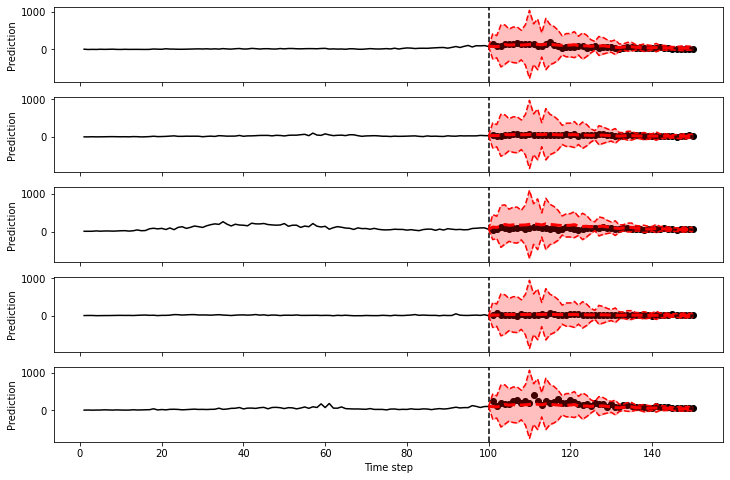

In [85]:
plot_timeseries(dataset='covid', baseline='CPRNN')

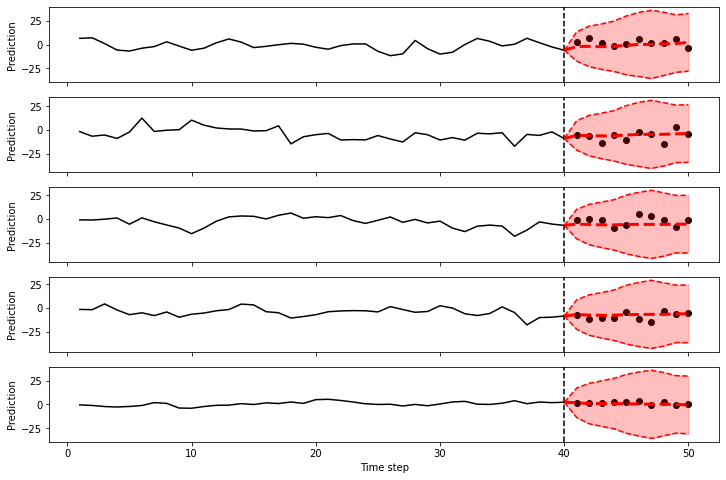

In [79]:
plot_timeseries(dataset='eeg', baseline='CPRNN')

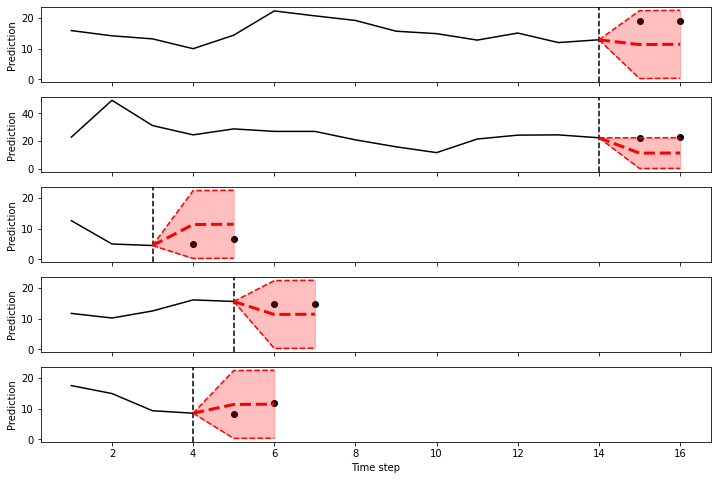

In [81]:
plot_timeseries(dataset='mimic', baseline='CPRNN')

## Retraining models

In [1]:
from utils.train_medical import run_medical_experiments
mimic_results = run_medical_experiments(retrain=True, dataset='mimic', baselines=['CPRNN'], save_results=False, save_model=True)

Training CPRNN
Epoch: 0	Train loss: 156.74915640694755
Epoch: 50	Train loss: 53.13235078539167
Epoch: 100	Train loss: 53.64533070155552
Epoch: 150	Train loss: 51.56313732692173
Epoch: 200	Train loss: 55.60751519884382
Epoch: 250	Train loss: 51.39998326982771
Epoch: 300	Train loss: 50.69910785130092
Epoch: 350	Train loss: 51.46189144679478
Epoch: 400	Train loss: 51.4951046534947
Epoch: 450	Train loss: 51.346938133239746
Epoch: 500	Train loss: 52.24199744633266
Epoch: 550	Train loss: 52.51100335802351
Epoch: 600	Train loss: 50.9170960017613
Epoch: 650	Train loss: 55.39422171456473
Epoch: 700	Train loss: 67.61379609789167
Epoch: 750	Train loss: 50.58711297171457
Epoch: 800	Train loss: 51.071151869637625
Epoch: 850	Train loss: 50.609366689409526
Epoch: 900	Train loss: 51.22157260349819
Epoch: 950	Train loss: 51.123785155160085


In [ ]:
eeg_results = run_medical_experiments(retrain=True, dataset='eeg', baselines=['CPRNN'], save_results=False, save_model=True)

Training CPRNN
Epoch: 0	Train loss: 176.12619096330067
Epoch: 50	Train loss: 70.02112205283156


In [ ]:
eeg_results = run_medical_experiments(retrain=True, dataset='eeg', baselines=['CPRNN'], save_results=False, save_model=True)